# Inicio

In [1]:
#Importar Librerías
 
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; } div.cell.selected {border-left-width: 10px !important;}</style>"))
import os
import shutil
import glob
from sympy import *
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools as it
from PIL import Image
from IPython.display import clear_output
import random
if not 'notebook_dir' in globals():
    notebook_dir = os.getcwd()
print('Notebook directory: ' + notebook_dir)
os.chdir(notebook_dir)  # If you change the current working dir, this will take you back to the workbook dir.
top_dir = notebook_dir
from fastai.tabular.all import *
from skimage import data
from skimage.filters import threshold_multiotsu
import inspect
from sklearn.manifold import TSNE
from sklearn import decomposition
#from sklearn.preprocessing import scaled
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import more_itertools
from sklearn.manifold import TSNE
import cv2
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import imutils
from time import time
init_printing() # Numeros más bonitos
from matplotlib.colors import LogNorm, PowerNorm
from fastai.vision.all import Path
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
from urllib.error import HTTPError

def bar_counts(df_a, feat1, scale = 'lin'):
    ind = (df_a[feat1].value_counts()).index[:]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].value_counts()[:])}).sort_values('Index')
    a1 = temp_df.Index
    b1 = temp_df.Counts
    fig = plt.figure(figsize = [1.5*len(a1),len(a1)/2])
    plt.xticks(rotation = 40)
    plt.bar(a1,b1)
    plt.title(feat1, fontsize = 14)
    plt.ylabel('Número de personas', fontsize = 14)
    if scale == 'log':
        plt.yscale('log')
        
        
def multi_bar(df,feat1,feat2,vals_f2='all',normalize = True, plot = True, alpha = 1):

    df_a = df.iloc[np.where((df['NIVEL'] == 1) & (df['OCUP1'] != 'No Aplicable'))].copy() 

    if type(vals_f2) == str:
        if vals_f2 == 'all':
            df_a = df_a.copy()
            ind = (df_a[feat2].value_counts()).index[:]
            temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat2].value_counts()[:])}).sort_values('Index')
            a2 = temp_df.Index
            vals_f2 = np.array(a2)
            num_ft = len(a2)
        else:
            num_ft = 1
            df_a = df_a.iloc[np.where(df_a[feat2] == vals_f2)].copy().reset_index().drop('index',axis = 1)
    elif type(vals_f2) == list:
        df_a = df_a[df_a[feat2].isin(vals_f2)].copy().reset_index().drop('index',axis = 1)
        num_ft = len(vals_f2)
        if len(vals_f2) == 1:
            vals_f2 = vals_f2[0]

    

    if num_ft == 1:
        ind = (df_a[feat1].value_counts()).index[:]
        temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].value_counts()[:])}).sort_values('Index')
        a1 = temp_df.Index
        b1 = temp_df.Counts
        fig = plt.figure(figsize = [1.5*len(a1),len(a1)/2])
        plt.xticks(rotation = 40)
        plt.bar(a1,b1, label = vals_f2, alpha = alpha)
        plt.title(feat1, fontsize = 14)
        plt.ylabel('Número de personas', fontsize = 14)
    else:

        ind0 = (df_a[feat1].value_counts()).index[:]
        temp_df = pd.DataFrame({'Index':ind0, 'Counts':np.array(df_a[feat1].value_counts()[:])}).sort_values('Index')
        a0 = temp_df.Index
        x = np.arange(len(a0))
        a0_num = np.array(range(len(a0)))
        a0_df = pd.DataFrame({'a0':a0,'a0_num':a0_num})
        
        fig, ax = plt.subplots(figsize=[1.5*len(a0)+3,len(a0)*0.75+3])
        plt.bar(a0_num,np.zeros(len(a0)), fill = False) #Truco para conservar el orden de los índices
        plt.xticks(x, a0, rotation = 40, fontsize = 10)
        width = 0.8/num_ft  # the width of the bars

        for fta,i in zip(vals_f2,range(num_ft)):
            ind = (df_a[feat1].iloc[np.where(df_a[feat2] == fta)].value_counts()).index[:]
            temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].iloc[np.where(df_a[feat2] == fta)].value_counts()[:])}).sort_values('Index')
            a1 = temp_df.Index
            a1_num = []
            for ai in a1:
                a1_num.append(a0_df.a0_num.iloc[np.where(a0_df.a0 == ai)])
            b1 = temp_df.Counts
            b1_err = np.sqrt(temp_df.Counts)
            a1_num = np.array(a1_num).flatten()
            if normalize == True:
                b1,b1_err = b1/np.sum(temp_df.Counts),b1_err/np.sum(temp_df.Counts)

            kn = i-(num_ft-1)/2

            rects = ax.bar(a1_num + width*kn, b1, width, label = fta, fill = True, yerr = b1_err, capsize = 25*width, alpha = alpha)
            color = np.array(rects.patches[0].get_facecolor())
            color[-1] = 1
            if plot == True:
                plt.plot(a1_num + width*kn,b1,color=color, linewidth = 2)

            plt.ylabel('Fracción de personas', fontsize = 14)
            plt.xlabel(feat1, fontsize = 14)
            plt.legend(fontsize = np.sqrt((1.5*len(a0)+6)*(len(a0)+6)*0.75)+2)


            fig.tight_layout()


Notebook directory: /home/gabriel/Desktop


In [18]:
# PROCESADO:
trimestres = [1,2,3,4] #Debe ser una lista [1,2,3,4]
anyos = [2019] # Debe ser una lista. Año completo: 2021, nunca 21 [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


igualar_sexos = True #Mismo numero de hombres que de mujeres: True. Base completa: False
sust_nac = True #Cambiar los códigos numéricos de la nacionalidad por la nacionalidad en sí
sust_form = True #Cambiar los códigos numéricos del nivel de formación por el nivel de formación
sust_est_civ = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_edad = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_ocup = True #Lo mismo pero con el sector de trabajo
sust_regna = True
sust_sexo = True
sust_ccaa = True
sust_ayudfa = True
sust_cse = True

recuento_idi_acr = True # Añadir una columna de número de idiomas acreditados
# Contenido (carpetas donde se guardan las pcas, etc.):


df_s = []
etiq_s = []
for anyo in anyos:
    for trimestre in trimestres:
        try:
            r = urllib2.urlopen('https://www.ine.es/ftp/microdatos/epa/datos_'+str(trimestre)+'t'+str(anyo)[-2:]+'.zip').read()
            file = ZipFile(BytesIO(r))
            salaries_csv = file.open('CSV/EPA_'+str(anyo)+'T'+str(trimestre)+'.csv')

            df_b = pd.read_csv(salaries_csv, sep = '\t', low_memory=False)
            
            if anyo == 2021:
                df_b['EDAD5'] = df_b['EDAD1']
                df_b.drop('EDAD1',axis = 1)
            
            df_s.append(df_b)
            etiq_s.append(str(anyo)+'-t'+str(trimestre))
            
        except HTTPError:
            print('ERROR: Datos no disponibles para Trimestre',trimestre,' del año',anyo)
            print('Continuando sin esos datos.')
            
        
df = pd.concat(df_s, ignore_index = True)

df['SEXO1'] = (df['SEXO1']-1).astype(bool)
df['SEXO1']=(df['SEXO1'])*2-1

if igualar_sexos == True:
    # Igualar el número de hombres y mujeres en la encuesta
    #np.random.seed(42)
    
    remove_n = len(np.where(df.SEXO1 == 1)[0]) - len(np.where(df.SEXO1 == -1)[0])
    #hay mas hombres o mujeres?
    if remove_n < 0: #mas hombres
        remove_n = np.abs(remove_n)
        drop_indices = np.random.choice(df.iloc[np.where(df.SEXO1 == -1)].index, remove_n, replace=False)
        df_temp = df.iloc[np.where(df.SEXO1 == -1)].drop(drop_indices)
        df = pd.concat([df_temp,df.drop(np.where(df.SEXO1 == -1)[0])],ignore_index = True)
    else:
        drop_indices = np.random.choice(df.iloc[np.where(df.SEXO1 == 1)].index, remove_n, replace=False)
        df_temp = df.iloc[np.where(df.SEXO1 == 1)].drop(drop_indices)
        df = pd.concat([df_temp,df.drop(np.where(df.SEXO1 == 1)[0])],ignore_index = True)            

    



a = df.SEXO1.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')

if sust_nac == True:
    dic_nac = {1:'Española',
               2:'Española y doble nacionalidad',
               3:'Extranjera'}
    
    
    df['NAC1'] = df.NAC1.replace(dic_nac)
    

    
if sust_form == True:
    dic_form = {'AN':'1-Analfabetos',
                'P1':'2-Educación primaria \n incompleta',
                'P2':'3-Educación primaria' ,
                'S1':'4-Primera etapa de \n educación secundaria',
                'SG':'5-Segunda etapa de \n educación secundaria.\n Orientación general',
                'SP':'6-Segunda etapa de \n educación secundaria.\n Orientación profesional',
                'SU':'7-Educación superior' ,
                '  ':'8-NS / NC'
                }

    
    df['NFORMA'] = df.NFORMA.replace(dic_form)


    
if sust_est_civ == True:
    dic_nac = {'1':'Soltero',
                '2':'Casado',
                '3':'Viudo',
                '4':'Separado o divorciado',
                ' ':'NS/SC'}
    
    
    df['ECIV1'] = df.ECIV1.replace(dic_nac)
    
    
if sust_edad == True:
    df['EDAD_NUM'] = df['EDAD5']
    dic_edad = {0:'0 a 4 años',
                5:'5 a 9 años',
                10:'10 a 15 años',
                16:'16 a 19 años',
                20:'20 a 24 años',
                25:'25 a 29 años',
                30:'30 a 34 años',
                35:'35 a 39 años',
                40:'40 a 44 años',
                45:'45 a 49 años',
                50:'50 a 54 años',
                55:'55 a 59 años',
                60:'60 a 64 años',
                65:'65 o más años'
                }
    
    
    df['EDAD5'] = df.EDAD5.replace(dic_edad)
    
if sust_ocup == True:

    dic_ocup = {'0':'Ocupaciones militares.\n Fuerzas armadas',
                '1':'Directores y gerentes',
                '2':'Técnicos y Profesionales \ncientíficos e intelectuales',
                '3':'Técnicos y Profesionales\n de apoyo',
                '4':'Empleados contables, administrativos\n y otros empleados de oficina',
                '5':'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores',
                '6':'Trabajadores cualificados\n en el sector agrícola,\n ganadero, forestal y pesquero',
                '7':'Artesanos y trabajadores\n cualificados de las\n industrias manufactureras\n y la construcción',
                '8':'Operadores de instalaciones\n y maquinaria, y montadores',
                '9':'Ocupaciones elementales.\n Trabajadores no cualificados',
                ' ':'No Aplicable'
                }
    
    
    df['OCUP1'] = df.OCUP1.replace(dic_ocup) 
    
    
if sust_regna == True:

    dic_regna = {'115':'UE-15',                                       
                '125':'UE-25',                            
                '128':'UE-28',                         
                '100':'Resto de Europa',                              
                '200':'África',                                       
                '300':'América del \n Norte',                            
                '310':'Centroamérica\n y Caribe',                       
                '350':'Sudamérica',                                   
                '400':'Asia Oriental\n (Lejano Oriente)',               
                '410':'Asia Occidental\n (Oriente Próximo)',            
                '420':'Asia del Sur\n y Sudoeste',                      
                '500':'Oceanía', 
                '   ':'España'
                }
    
    
    df['REGNA1'] =  df.REGNA1.replace(dic_regna) 
    
if sust_ccaa == True:

    dic_ccaa = {1:'Andalucía',
                2:'Aragón',
                3:'Asturias, Principado de',
                4:'Balears, Illes',
                5:'Canarias',
                6:'Cantabria',
                7:'Castilla y León',
                8:'Castilla-La Mancha',
                9:'Cataluña',
                10:'Comunitat Valenciana',
                11:'Extremadura',
                12:'Galicia',
                13:'Madrid, Comunidad de',
                14:'Murcia, Región de',
                15:'Navarra, Comunidad Foral de',
                16:'País Vasco',
                17:'Rioja, La',
                51:'Ceuta',
                52:'Melilla'

                }
    
    
    df['CCAA'] =  df.CCAA.replace(dic_ccaa) 
    

if sust_sexo == True:
    dic_sexo = {-1:'Hombre',
                1:'Mujer'}
    
    
    df['SEXO1'] = df.SEXO1.replace(dic_sexo)
    
    
if sust_ayudfa == True:
    dic_ayudfa = {' ':'No',
                  '1':'Sí',
                  '6':'No'}
    
    
    df['AYUDFA'] = df.AYUDFA.replace(dic_ayudfa)
    
    

if sust_cse == True:

    dic_cse = {'01':'Empresarios agrarios con asalariados',
                '02':'Empresarios \nagrarios sin asalariados',
                '03':'Miembros de \ncooperativas agrarias',
                '04':'Directores y jefes\n de explotaciones agrarias',
                '05':'Resto de trabajadores \nde explotaciones agrarias',
                '06':'Profesionales y técnicos\n por cuenta propia',
                '07':'Empresarios no agrarios\n con asalariados',
                '08':'Empresarios no agrarios\n sin asalariados',
                '09':'Miembros de cooperativas\n no agrarias',
                '10':'Directores públicos y\n de establecimientos',
                '11':'Profesionales y técnicos\n por cuenta ajena',
                '12':'Administración pública',
                '13':'Resto del personal\n administrativo y comercial',
                '14':'Resto del personal\n de los servicios',
                '15':'Mandos intermedios de\n establecimientos no agrarios',
                '16':'Operarios cualificados\n de establecimientos no agrarios',
                '17':'Operarios sin especialización\n de establecimientos no agrarios',
                '18':'Profesionales de\n las fuerzas armadas',
                '19':'No clasificables por\n condición socioeconómica',
                '  ':'No Aplicable'
                }
    
    
    df['CSE'] = df.CSE.replace(dic_cse) 
    
    
'''
if sust_idiomas == True:
    dic_idi_m = {1:'Español',
                2:'Catalán',
                3:'Euskera',
                4:'Gallego',
                5:'Valenciano',
                6:'Inglés',
                7:'Francés',
                8:'Alemán',
                9:'Italiano',
                10:'Portugués',
                11:'Rumano',
                12:'Árabe',
                13:'Chino',
                14:'Ruso',
                15:'Otros idiomas',
                99:'NS/NC'}
    
    dic_idi = {'01':'Español',
            '02':'Catalán',
            '03':'Euskera',
            '04':'Gallego',
            '05':'Valenciano',
            '06':'Inglés',
            '07':'Francés',
            '08':'Alemán',
            '09':'Italiano',
            '10':'Portugués',
            '11':'Rumano',
            '12':'Árabe',
            '13':'Chino',
            '14':'Ruso',
            '15':'Otros idiomas',
            '99':'NS/NC',
            '  ':'No Aplicable'}
    
    df['IDI_MT1'] = df.IDI_MT1.replace(dic_idi_m)
    df['IDI_MT2'] = df.IDI_MT2.replace(dic_idi)
    df['IDIOMA1'] = df.IDIOMA1.replace(dic_idi)
    df['IDIOMA2'] = df.IDIOMA2.replace(dic_idi)
    df['IDIOMA3'] = df.IDIOMA3.replace(dic_idi)
    df['IDIOMA4'] = df.IDIOMA4.replace(dic_idi)
    

if recuento_idi_acr == True:
    #NUM_TIT_IDI : Número de títulos de idiomas que puede acreditar

    ids = []

    for a in range(len(df.ACREIDI1)):
        b = 0
        if df.ACREIDI1.iloc[a] == '1':
            b += 1
        if df.ACREIDI2.iloc[a] == '1':
            b += 1
        if df.ACREIDI3.iloc[a] == '1':
            b += 1
        if df.ACREIDI4.iloc[a] == '1':
            b += 1

        ids.append(b)

    df['NUM_TIT_IDI'] = ids
'''
print()

Mujeres: 315529 , Porcentje:  50.0 %
Hombres: 315529 , Porcentje:  50.0 %



In [27]:
df.iloc[np.where(df.NIVEL == 1)].CSE.value_counts().index

Index(['No Aplicable', 'Resto del personal\n de los servicios',
       'Profesionales y técnicos\n por cuenta ajena',
       'Resto del personal\n administrativo y comercial',
       'Operarios cualificados\n de establecimientos no agrarios',
       'Empresarios no agrarios\n sin asalariados',
       'Empresarios no agrarios\n con asalariados',
       'Operarios sin especialización\n de establecimientos no agrarios',
       'Profesionales y técnicos\n por cuenta propia',
       'Resto de trabajadores \nde explotaciones agrarias',
       'Directores públicos y\n de establecimientos',
       'Empresarios \nagrarios sin asalariados',
       'Profesionales de\n las fuerzas armadas', 'Administración pública',
       'Mandos intermedios de\n establecimientos no agrarios',
       'Empresarios agrarios con asalariados',
       'No clasificables por\n condición socioeconómica',
       'Miembros de cooperativas\n no agrarias',
       'Miembros de \ncooperativas agrarias',
       'Directores y je

In [162]:
# get attributes of dict: dic_edad.__dir__()
lim_edad = 30

indices = list(np.where(np.array(list(dic_edad.keys())) < lim_edad)[0])

#list(dic_edad)[list(np.where(np.array(list(dic_edad.keys())) < lim_edad)[0])]

df_temp = pd.DataFrame({'Index': dic_edad.keys(),'Text':dic_edad.values()})
vals_lim = df_temp.iloc[np.where(df_temp.Index < lim_edad)].Text

In [3]:
df.REGNA1.value_counts()

España                                 1104680
Sudamérica                               37256
África                                   19051
UE-15                                    14381
UE-28                                    11690
Centroamérica\n y Caribe                  9455
Resto de Europa                           5747
Asia del Sur\n y Sudoeste                 2852
Asia Oriental\n (Lejano Oriente)          2160
UE-25                                     1226
América del \n Norte                       601
Asia Occidental\n (Oriente Próximo)        319
Oceanía                                     98
Name: REGNA1, dtype: int64

In [12]:
pim = (len(df) - df.REGNA1.value_counts()['España'])/len(df)
print('El {}% de los trabajadores encuestados nacieron fuera de España'.format(np.round(pim*100,1)))

El 8.7% de los trabajadores encuestados nacieron fuera de España


In [21]:
df.AYUDFA.value_counts().index

Index(['No', 'Sí'], dtype='object')

In [77]:
ind = (df.EDAD1.value_counts()).index
pd.DataFrame({'Index':ind, 'Counts':np.array(df.EDAD1.value_counts())}).sort_values('Index')

,Index,Counts
13,0 a 4 años,13950
6,10 a 15 años,26650
10,16 a 19 años,17485
8,20 a 24 años,19723
12,25 a 29 años,15835
11,30 a 34 años,16380
7,35 a 39 años,22816
5,40 a 44 años,30955
3,45 a 49 años,33702
9,5 a 9 años,18964


In [16]:
df.CCAA.value_counts().index

Index(['Andalucía', 'Galicia', 'Cataluña', 'Castilla y León',
       'Comunitat Valenciana', 'Castilla-La Mancha', 'Madrid, Comunidad de',
       'País Vasco', 'Aragón', 'Canarias', 'Extremadura', 'Murcia, Región de',
       'Asturias, Principado de', 'Balears, Illes', 'Cantabria',
       'Navarra, Comunidad Foral de', 'Rioja, La', 'Ceuta', 'Melilla'],
      dtype='object')

In [42]:
df.EDAD5.value_counts().index

Index(['65 o más años', '50 a 54 años', '45 a 49 años', '55 a 59 años',
       '40 a 44 años', '60 a 64 años', '10 a 15 años', '35 a 39 años',
       '5 a 9 años', '20 a 24 años', '30 a 34 años', '25 a 29 años',
       '16 a 19 años', '0 a 4 años'],
      dtype='object')

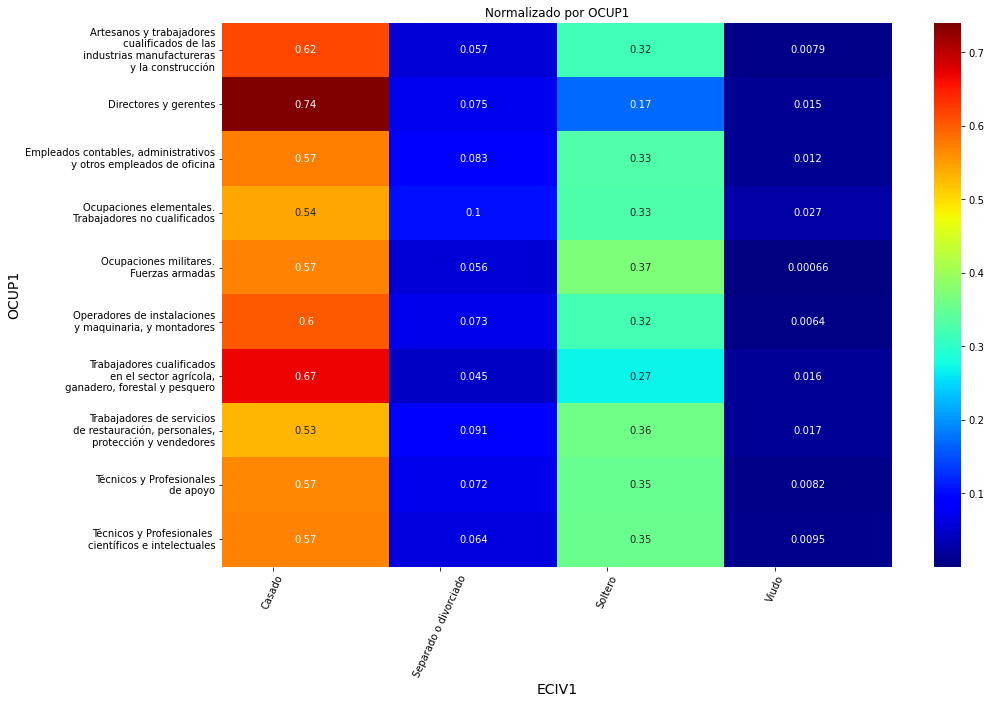

In [5]:
df_a = df.iloc[np.where((df['NIVEL'] == 1) & (df['OCUP1'] != 'No Aplicable'))].copy() #.iloc[np.where((df['EST_B2_5'] != ' ') & (df['EST_B2_5'] != '9') & (df['OCUP1'] != 'Otros'))].copy() #& (df['ACREIDI2'] == '1')

limi = 99
limi2 = 99
feat1 = 'OCUP1'
feat2 = 'ECIV1'# 'NFORMA' 'EDAD5' 'ECIV1' 'NAC1' 'OCUP1' 'REGNA1' 'TRAPLU' 'CCAA' 'AYUDFA'
normalize = 1 # Normalize over 1: feature 1 (normalized rows), 2: feature 2, False: No normalization
sort_1 = True
sort_2 = True

filtro_edad = 'None' #'mayor_que' o 'menor_que' dependiendo del tipo de filtro que queremos aplicar. 'None' para ninguno
lim_edad = 99


if filtro_edad == 'mayor_que':
    df_a = df_a.iloc[np.where(df_a.EDAD_NUM > lim_edad)].copy()
elif filtro_edad == 'menor_que':
    df_a = df_a.iloc[np.where(df_a.EDAD_NUM < lim_edad)].copy()


if len(df_a[feat1].value_counts()) < limi:
    limi = len(df_a[feat1].value_counts())
    
if len(df_a[feat2].value_counts()) < limi2:
    limi2 = len(df_a[feat2].value_counts())

if sort_1 == False:
    a1 = df_a[feat1].value_counts().index[:limi]
    b1 = df_a[feat1].value_counts()[:limi]
else:
    ind = (df_a[feat1].value_counts()).index[:limi]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].value_counts()[:limi])}).sort_values('Index')
    a1 = temp_df.Index
    b1 = temp_df.Counts
    
if sort_2 == False:
    a2 = df_a[feat2].value_counts().index[:limi2]
    b2 = df_a[feat2].value_counts()[:limi2]
else:
    ind = (df_a[feat2].value_counts()).index[:limi2]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat2].value_counts()[:limi2])}).sort_values('Index')
    a2 = temp_df.Index
    b2 = temp_df.Counts


hem = np.zeros([limi,limi2])

for i,f1 in zip(range(limi),a1):
    for j,f2 in zip(range(limi2),a2):
        #print(f1,f2)
        hem[i,j] = len(df_a.iloc[np.where((df_a[feat1] == f1)&(df_a[feat2] == f2))])
        #print(f1,f2,hem[i,j])

if normalize == 1:
    n_por = feat1
    for i in range(limi):
        norm = np.sum(hem[i,:])
        for j in range(limi2):
            hem[i,j] = hem[i,j]/norm      
elif normalize == 2:
    n_por = feat2
    for i in range(limi2):
        norm = np.sum(hem[:,i])
        for j in range(limi):
            hem[j,i] = hem[j,i]/norm
elif normalize == False:
    n_por = 'Ninguno'

        
plt.figure(figsize = [15,10])
ax = sns.heatmap((hem),cmap=plt.cm.jet, annot = True) #, norm = LogNorm()
plt.title('Normalizado por {}'.format(n_por))
plt.xticks(np.array(range(limi2))+0.3,a2, rotation = 65)
plt.yticks(np.array(range(limi))+0.5,(np.array(a1)), rotation = 0)
plt.xlabel(feat2, fontsize = 14)
plt.ylabel(feat1, fontsize = 14)
plt.show()
#hem

In [331]:
df_a.EDAD1.value_counts()

25 a 29 años    9658
20 a 24 años    6295
16 a 19 años     941
Name: EDAD1, dtype: int64

In [332]:
df.iloc[np.where((df['NIVEL'] == 1) & (df['OCUP1'] != 'No Aplicable') & (df['REGNA1'] == 'Asia Oriental\n (Lejano Oriente)'))].OCUP1.value_counts()

Trabajadores de servicios\n de restauración, personales,\n protección y vendedores                1277
Directores y gerentes                                                                               89
Técnicos y Profesionales \ncientíficos e intelectuales                                              57
Ocupaciones elementales.\n Trabajadores no cualificados                                             43
Técnicos y Profesionales\n de apoyo                                                                 43
Operadores de instalaciones\n y maquinaria, y montadores                                            36
Empleados contables, administrativos\n y otros empleados de oficina                                 33
Artesanos y trabajadores\n cualificados de las\n industrias manufactureras\n y la construcción      16
Name: OCUP1, dtype: int64

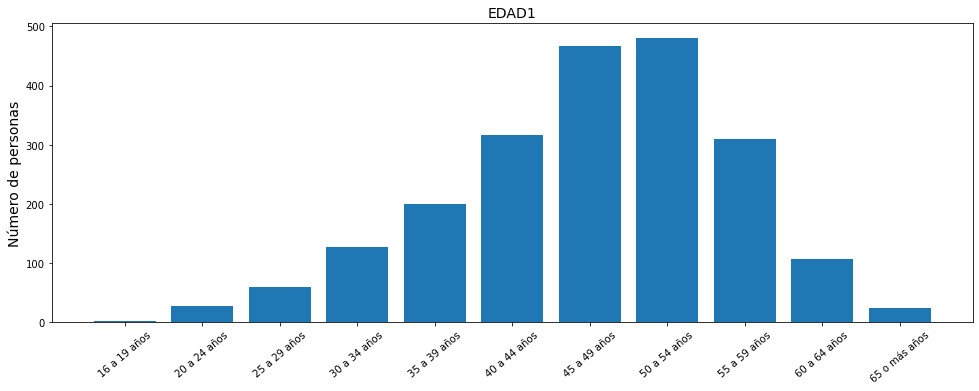

In [322]:
bar_counts(df.iloc[np.where((df.NIVEL == 1) & (df['OCUP1'] != 'No Aplicable') & (df['REGNA1'] == 'UE- 15'))],'EDAD1',scale = 'lin')

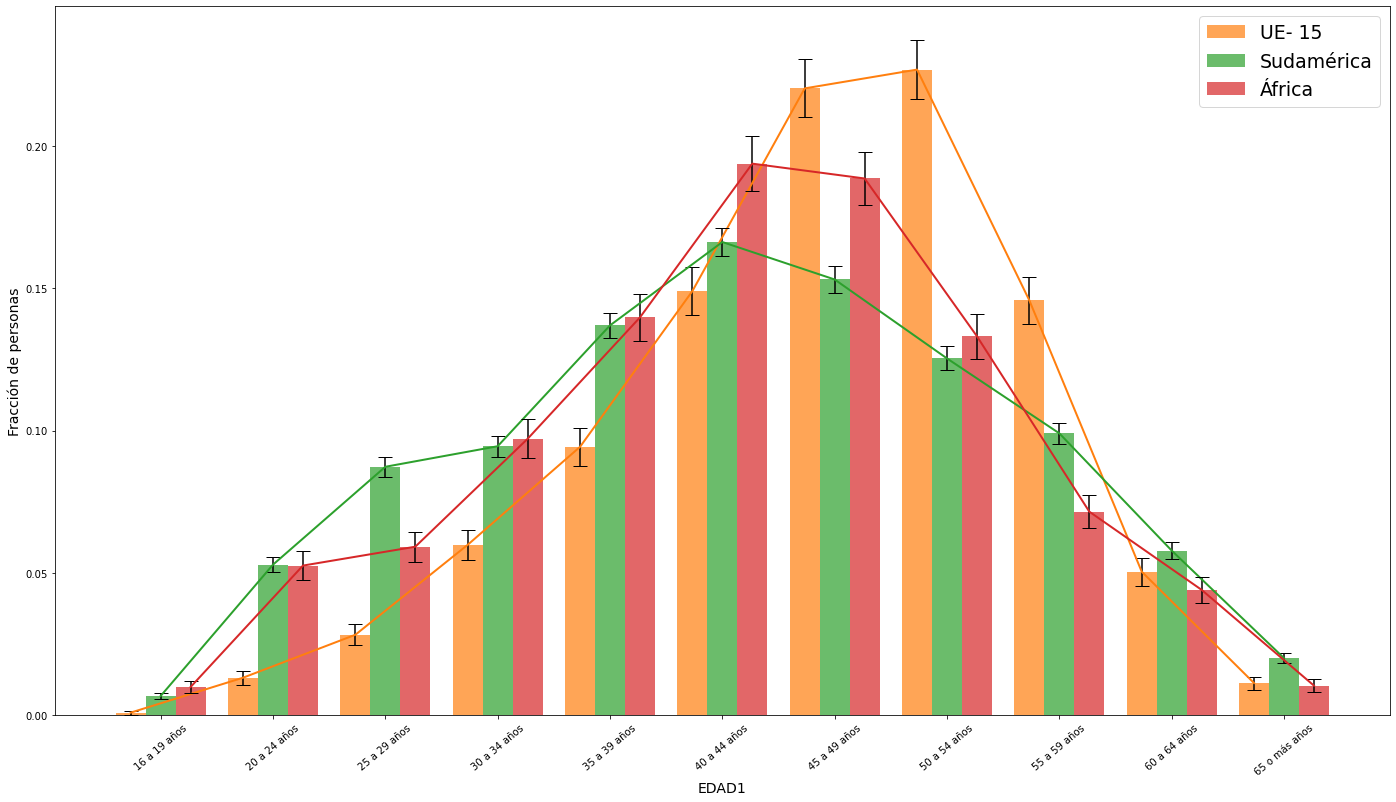

In [338]:
feat1 = 'EDAD1'
feat2 = 'REGNA1'
vals_f2 = ['UE- 15','Sudamérica','África']
normalize = True
multi_bar(df = df,feat1 = feat1, feat2 = feat2, vals_f2 = vals_f2, normalize = True, plot = True, alpha = 0.7)

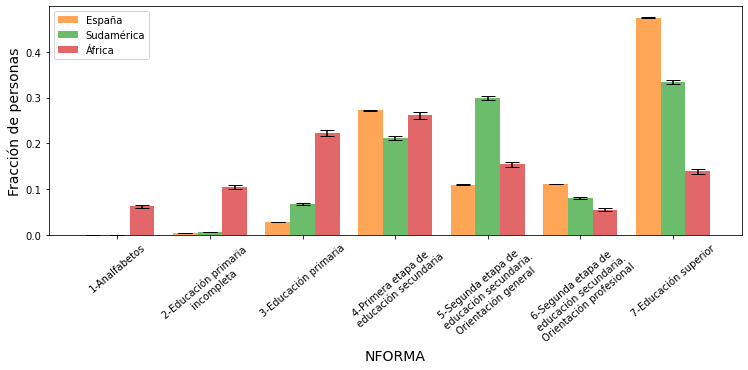

In [255]:
feat1 = 'NFORMA'
feat2 = 'REGNA1'
vals_f2 = ['España','Sudamérica','África']
normalize = True
multi_bar(df = df,feat1 = feat1, feat2 = feat2, vals_f2 = vals_f2, normalize = True, plot = False, alpha = 0.7)

In [318]:
df.REGNA1.value_counts()

España                                 1467772
Sudamérica                               49915
África                                   24510
UE- 15                                   18300
UE- 28                                   14870
Centroamérica\n y Caribe                 12755
Resto de Europa                           8353
Asia del Sur\n y Sudoeste                 3681
Asia Oriental\n (Lejano Oriente)          2828
UE- 25                                    1582
América del \n Norte                       841
Asia Occidental\n (Oriente Próximo)        463
Oceanía                                    152
Name: REGNA1, dtype: int64

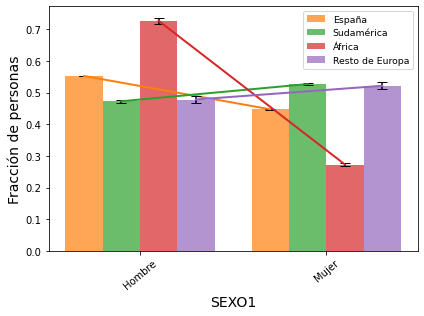

In [3]:
feat1 = 'SEXO1'
feat2 = 'REGNA1'
vals_f2 = ['España','Sudamérica','África','Resto de Europa']
normalize = True
multi_bar(df = df,feat1 = feat1, feat2 = feat2, vals_f2 = vals_f2, normalize = True, plot = True, alpha = 0.7)

In [284]:
df.iloc[np.where(df.REGNA1 != 'España')].SEXO1.value_counts(normalize = True)

 1    0.549944
-1    0.450056
Name: SEXO1, dtype: float64

In [13]:
df.CCAA.value_counts().index

Int64Index([1, 12, 9, 7, 10, 8, 13, 16, 2, 5, 11, 14, 3, 4, 15, 6, 17, 52, 51], dtype='int64')

# Evolución Temporal

In [19]:
# PROCESADO:
trimestres = [1,3] #Debe ser una lista [1,2,3,4]
anyos = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] # Debe ser una lista. Año completo: 2021, nunca 21 [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


igualar_sexos = True #Mismo numero de hombres que de mujeres: True. Base completa: False
sust_nac = True #Cambiar los códigos numéricos de la nacionalidad por la nacionalidad en sí
sust_form = True #Cambiar los códigos numéricos del nivel de formación por el nivel de formación
sust_est_civ = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_edad = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_ocup = True #Lo mismo pero con el sector de trabajo
sust_regna = True
sust_sexo = True
sust_ccaa = True

recuento_idi_acr = True # Añadir una columna de número de idiomas acreditados
# Contenido (carpetas donde se guardan las pcas, etc.):


df_s = []
etiq_s = []
for anyo in anyos:
    for trimestre in trimestres:
        try:
            r = urllib2.urlopen('https://www.ine.es/ftp/microdatos/epa/datos_'+str(trimestre)+'t'+str(anyo)[-2:]+'.zip').read()
            file = ZipFile(BytesIO(r))
            salaries_csv = file.open('CSV/EPA_'+str(anyo)+'T'+str(trimestre)+'.csv')

            df_b = pd.read_csv(salaries_csv, sep = '\t', low_memory=False)
            
            if anyo == 2021:
                df_b['EDAD5'] = df_b['EDAD1']
                df_b.drop('EDAD1',axis = 1)
            
            
            #---------- Sustituciones -------------
                        
            df_b['SEXO1'] = (df_b['SEXO1']-1).astype(bool)
            df_b['SEXO1']=(df_b['SEXO1'])*2-1

            if igualar_sexos == True:
                # Igualar el número de hombres y mujeres en la encuesta
                #np.random.seed(42)

                remove_n = len(np.where(df_b.SEXO1 == 1)[0]) - len(np.where(df_b.SEXO1 == -1)[0])
                #hay mas hombres o mujeres?
                if remove_n < 0: #mas hombres
                    remove_n = np.abs(remove_n)
                    drop_indices = np.random.choice(df_b.iloc[np.where(df_b.SEXO1 == -1)].index, remove_n, replace=False)
                    df_temp = df_b.iloc[np.where(df_b.SEXO1 == -1)].drop(drop_indices)
                    df_b= pd.concat([df_temp,df_b.drop(np.where(df_b.SEXO1 == -1)[0])],ignore_index = True)
                else:
                    drop_indices = np.random.choice(df_b.iloc[np.where(df_b.SEXO1 == 1)].index, remove_n, replace=False)
                    df_temp = df_b.iloc[np.where(df_b.SEXO1 == 1)].drop(drop_indices)
                    df_b= pd.concat([df_temp,df_b.drop(np.where(df_b.SEXO1 == 1)[0])],ignore_index = True)   


            if sust_nac == True:
                dic_nac = {1:'Española',
                           2:'Española y doble nacionalidad',
                           3:'Extranjera'}


                df_b['NAC1'] = df_b.NAC1.replace(dic_nac)



            if sust_form == True:
                dic_form = {'AN':'1-Analfabetos',
                            'P1':'2-Educación primaria \n incompleta',
                            'P2':'3-Educación primaria' ,
                            'S1':'4-Primera etapa de \n educación secundaria',
                            'SG':'5-Segunda etapa de \n educación secundaria.\n Orientación general',
                            'SP':'6-Segunda etapa de \n educación secundaria.\n Orientación profesional',
                            'SU':'7-Educación superior' ,
                            '  ':'8-NS / NC'
                            }


                df_b['NFORMA'] = df_b.NFORMA.replace(dic_form)



            if sust_est_civ == True:
                dic_nac = {'1':'Soltero',
                            '2':'Casado',
                            '3':'Viudo',
                            '4':'Separado o divorciado',
                            ' ':'NS/SC'}


                df_b['ECIV1'] = df_b.ECIV1.replace(dic_nac)


            if sust_edad == True:
                df_b['EDAD_NUM'] = df_b['EDAD5']
                dic_edad = {0:'0 a 4 años',
                            5:'5 a 9 años',
                            10:'10 a 15 años',
                            16:'16 a 19 años',
                            20:'20 a 24 años',
                            25:'25 a 29 años',
                            30:'30 a 34 años',
                            35:'35 a 39 años',
                            40:'40 a 44 años',
                            45:'45 a 49 años',
                            50:'50 a 54 años',
                            55:'55 a 59 años',
                            60:'60 a 64 años',
                            65:'65 o más años'
                            }


                df_b['EDAD5'] = df_b.EDAD5.replace(dic_edad)

            if sust_ocup == True:

                dic_ocup = {'0':'Ocupaciones militares.\n Fuerzas armadas',
                            '1':'Directores y gerentes',
                            '2':'Técnicos y Profesionales \ncientíficos e intelectuales',
                            '3':'Técnicos y Profesionales\n de apoyo',
                            '4':'Empleados contables, administrativos\n y otros empleados de oficina',
                            '5':'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores',
                            '6':'Trabajadores cualificados\n en el sector agrícola,\n ganadero, forestal y pesquero',
                            '7':'Artesanos y trabajadores\n cualificados de las\n industrias manufactureras\n y la construcción',
                            '8':'Operadores de instalaciones\n y maquinaria, y montadores',
                            '9':'Ocupaciones elementales.\n Trabajadores no cualificados',
                            ' ':'No Aplicable'
                            }


                df_b['OCUP1'] = df_b.OCUP1.replace(dic_ocup) 


            if sust_regna == True:

                dic_regna = {'115':'UE-15',                                       
                            '125':'UE-25',                            
                            '128':'UE-28',                         
                            '100':'Resto de Europa',                              
                            '200':'África',                                       
                            '300':'América del \n Norte',                            
                            '310':'Centroamérica\n y Caribe',                       
                            '350':'Sudamérica',                                   
                            '400':'Asia Oriental\n (Lejano Oriente)',               
                            '410':'Asia Occidental\n (Oriente Próximo)',            
                            '420':'Asia del Sur\n y Sudoeste',                      
                            '500':'Oceanía', 
                            '   ':'España'
                            }


                df_b['REGNA1'] =  df_b.REGNA1.replace(dic_regna) 

                
            if sust_ccaa == True:

                dic_ccaa = {1:'Andalucía',
                            2:'Aragón',
                            3:'Asturias, Principado de',
                            4:'Balears, Illes',
                            5:'Canarias',
                            6:'Cantabria',
                            7:'Castilla y León',
                            8:'Castilla-La Mancha',
                            9:'Cataluña',
                            10:'Comunitat Valenciana',
                            11:'Extremadura',
                            12:'Galicia',
                            13:'Madrid, Comunidad de',
                            14:'Murcia, Región de',
                            15:'Navarra, Comunidad Foral de',
                            16:'País Vasco',
                            17:'Rioja, La',
                            51:'Ceuta',
                            52:'Melilla'

                            }
                
                df_b['CCAA'] =  df_b.CCAA.replace(dic_ccaa) 

            if sust_sexo == True:
                dic_sexo = {-1:'Hombre',
                            1:'Mujer'}


                df_b['SEXO1'] = df_b.SEXO1.replace(dic_sexo)
            
            
            df_s.append(df_b)
            etiq_s.append(str(anyo)+'-t'+str(trimestre))
            
        except HTTPError:
            print('ERROR: Datos no disponibles para Trimestre',trimestre,' del año',anyo)
            print('Continuando sin esos datos.')
            
        
df = pd.concat(df_s, ignore_index = True)

a = df.SEXO1.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')


Mujeres: 2671124 , Porcentje:  50.0 %
Hombres: 2671124 , Porcentje:  50.0 %


In [20]:
def plot_temp_asy(df_s,feat,vals_feat,etiq_s, limis = 0.75):
    # asymmetries (hombres - mujeres) / (hombres + mujeres)
    r_jj_tot = []

    for val_feat in vals_feat:
        r_jj = []
        for df in df_s:
            r_jj_h = df.iloc[np.where(df.SEXO1 == 'Hombre')][feat].value_counts()[val_feat]
            r_jj_m = df.iloc[np.where(df.SEXO1 == 'Mujer')][feat].value_counts()[val_feat]
            asy_jj = (r_jj_h-r_jj_m)/(r_jj_h+r_jj_m)
            r_jj.append(asy_jj)
            
        r_jj_tot.append(r_jj)
        
        
    plt.figure(figsize = [len(etiq_s),4+len(vals_feat)])
    x_s = np.array(range(len(etiq_s)))
    for val_feat,r_jj in zip(vals_feat,r_jj_tot):
        plt.plot(x_s,r_jj, label = val_feat)
    limis = limis
    if limis < np.max(r_jj_tot):
        limis = np.max(r_jj_tot)*1.1
    
    l = plt.ylim([-1*limis,limis])
    l = plt.xlim([x_s[0],x_s[-1]])
    l = plt.xticks(x_s,etiq_s)
    plt.hlines(0,x_s[0]-1,x_s[-1]+1, ls = '--', color = 'darkviolet')
    l = plt.title(r'$\frac{n_h - n_m}{n_h + n_m}$', fontsize = 30)
    l = plt.legend()

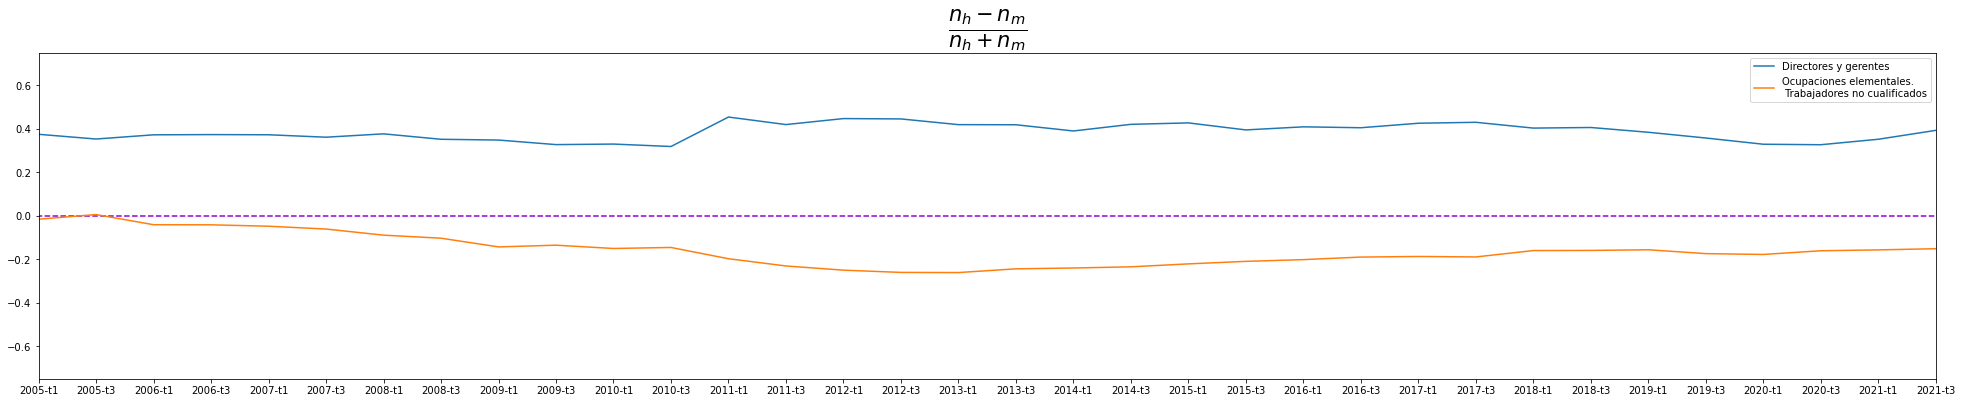

In [144]:
vals_feat = ['Directores y gerentes', 
            #'Empleados contables, administrativos\n y otros empleados de oficina',
            'Ocupaciones elementales.\n Trabajadores no cualificados']
            #'Ocupaciones militares.\n Fuerzas armadas',
            #'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores']

plot_temp_asy(df_s = df_s,feat = 'OCUP1', vals_feat = vals_feat, etiq_s = etiq_s)

In [33]:
x = -0.3
nm = (100)*(1-x)/2
print(np.round(nm),'% mujeres')
print(100-np.round(nm),'% hombres')

65.0 % mujeres
35.0 % hombres


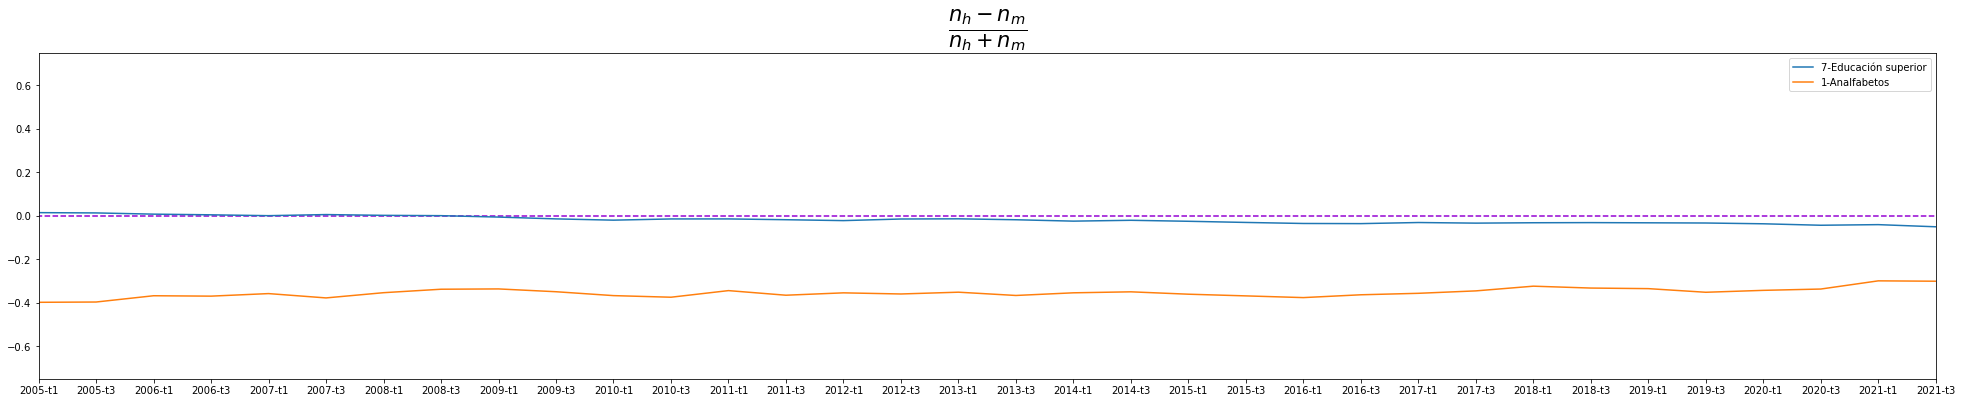

In [31]:
vals_feat = ['7-Educación superior','1-Analfabetos']
            #'Ocupaciones militares.\n Fuerzas armadas',
            #'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores']

plot_temp_asy(df_s = df_s,feat = 'NFORMA', vals_feat = vals_feat, etiq_s = etiq_s)

In [24]:
df_s[0].REGNA1.value_counts()

España                                 144274
Sudamérica                               2641
UE-15                                    1287
África                                   1213
Resto de Europa                           946
Centroamérica\n y Caribe                  373
Asia del Sur\n y Sudoeste                 113
UE-25                                      80
Asia Oriental\n (Lejano Oriente)           72
América del \n Norte                       43
Asia Occidental\n (Oriente Próximo)        17
Oceanía                                    15
Name: REGNA1, dtype: int64

In [139]:
# asymmetries (hombres - mujeres) / (hombres + mujeres)

feat = 'OCUP1'
vals_feat = ['Ocupaciones elementales.\n Trabajadores no cualificados']

r_jj_tot = []

for val_feat in vals_feat:
    r_jj = []
    for df in df_s:
        r_jj_h = df.iloc[np.where(df.SEXO1 == 'Hombre')][feat].value_counts()[val_feat]
        r_jj_m = df.iloc[np.where(df.SEXO1 == 'Mujer')][feat].value_counts()[val_feat]
        asy_jj = (r_jj_h-r_jj_m)/(r_jj_h+r_jj_m)
        r_jj.append(asy_jj)

    r_jj_tot.append(r_jj)

r_jj_tot

# Cosas Antiguas

<AxesSubplot:>

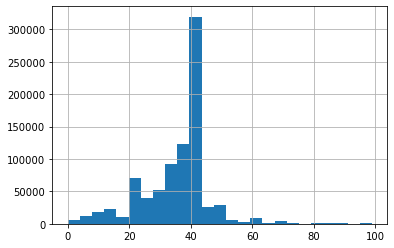

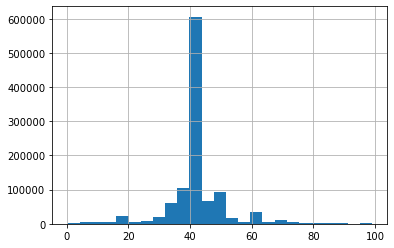

In [62]:
feat = 'HORASH'

(df[feat].iloc[np.where((df[feat] != '9999') & (df[feat] != '    ') & (df['SEXO1'] == 'Mujer'))].astype(np.float32)/100).hist(bins = 25)
plt.figure()
(df[feat].iloc[np.where((df[feat] != '9999') & (df[feat] != '    ') & (df['SEXO1'] == 'Hombre'))].astype(np.float32)/100).hist(bins = 25)

In [17]:
df[['EDAD_NUM','ECIV1']].iloc[np.where(df.ECIV1 != ' ')].astype(np.float32).corr()

,EDAD_NUM,ECIV1
EDAD_NUM,1.000000,0.520447
ECIV1,0.520447,1.000000


In [214]:
# PROCESADO:

igualar_sexos = False #Mismo numero de hombres que de mujeres: True. Base completa: False
sust_nac = True #Cambiar los códigos numéricos de la nacionalidad por la nacionalidad en sí
sust_form = True #Cambiar los códigos numéricos del nivel de formación por el nivel de formación
sust_est_civ = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_edad = True #Cambiar los códigos numéricos del estado civil por el estado civil en sí
sust_ocup = True #Lo mismo pero con el sector de trabajo
sust_regna = True

recuento_idi_acr = True # Añadir una columna de número de idiomas acreditados
# Contenido (carpetas donde se guardan las pcas, etc.):

carp = 'EPA_2021' #Carpeta de donde salen las PCAs

dd = top_dir + '/' + carp

if not os.path.isdir(dd):
    print('Creating directory:\n',dd)
    os.mkdir(dd)
    
dir = os.path.join(top_dir,carp)

lista_files = np.sort(Path('/home/gabriel/Desktop/' + carp).ls())

dfs = []

for fil in lista_files:
    direc = fil
    dfs.append(pd.read_csv(direc, sep = '\t', low_memory=False))

df = pd.concat(dfs)
df['SEXO1'] = (df['SEXO1']-1).astype(bool)
df['SEXO1']=(df['SEXO1'])*2-1

if igualar_sexos == True:
    # Igualar el número de hombres y mujeres en la encuesta
    np.random.seed(42)

    remove_n = len(np.where(df.SEXO1 == 1)[0]) - len(np.where(df.SEXO1 == -1)[0])
    drop_indices = np.random.choice(df.iloc[np.where(df.SEXO1 == 1)].index, remove_n, replace=False)
    df_temp = df.iloc[np.where(df.SEXO1 == 1)].drop(drop_indices)
    df = pd.concat([df_temp,df.drop(np.where(df.SEXO1 == 1)[0])],ignore_index = True)


a = df.SEXO1.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')

if sust_nac == True:
    dic_nac = {1:'Española',
               2:'Española y doble nacionalidad',
               3:'Extranjera'}
    
    
    df['NAC1'] = df.NAC1.replace(dic_nac)
    

    
if sust_form == True:
    dic_form = {'AN':'1-Analfabetos',
                'P1':'2-Educación primaria \n incompleta',
                'P2':'3-Educación primaria' ,
                'S1':'4-Primera etapa de \n educación secundaria',
                'SG':'5-Segunda etapa de \n educación secundaria.\n Orientación general',
                'SP':'6-Segunda etapa de \n educación secundaria.\n Orientación profesional',
                'SU':'7-Educación superior' ,
                '  ':'8-NS / NC'
                }

    
    df['NFORMA'] = df.NFORMA.replace(dic_form)


    
if sust_est_civ == True:
    dic_nac = {'1':'Soltero',
                '2':'Casado',
                '3':'Viudo',
                '4':'Separado o divorciado',
                ' ':'NS/SC'}
    
    
    df['ECIV1'] = df.ECIV1.replace(dic_nac)
    
    
if sust_edad == True:
    df['EDAD_NUM'] = df['EDAD1']
    dic_edad = {0:'0 a 4 años',
                5:'5 a 9 años',
                10:'10 a 15 años',
                16:'16 a 19 años',
                20:'20 a 24 años',
                25:'25 a 29 años',
                30:'30 a 34 años',
                35:'35 a 39 años',
                40:'40 a 44 años',
                45:'45 a 49 años',
                50:'50 a 54 años',
                55:'55 a 59 años',
                60:'60 a 64 años',
                65:'65 o más años'
                }
    
    
    df['EDAD1'] = df.EDAD1.replace(dic_edad)
    
if sust_ocup == True:

    dic_ocup = {'0':'Ocupaciones militares.\n Fuerzas armadas',
                '1':'Directores y gerentes',
                '2':'Técnicos y Profesionales \ncientíficos e intelectuales',
                '3':'Técnicos y Profesionales\n de apoyo',
                '4':'Empleados contables, administrativos\n y otros empleados de oficina',
                '5':'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores',
                '6':'Trabajadores cualificados\n en el sector agrícola,\n ganadero, forestal y pesquero',
                '7':'Artesanos y trabajadores\n cualificados de las\n industrias manufactureras\n y la construcción',
                '8':'Operadores de instalaciones\n y maquinaria, y montadores',
                '9':'Ocupaciones elementales.\n Trabajadores no cualificados',
                ' ':'Otros'
                }
    
    
    df['OCUP1'] = df.OCUP1.replace(dic_ocup) 
    
    
if sust_regna == True:

    dic_regna = {'115':'UE- 15',                                       
                '125':'UE- 25 ',                            
                '128':'UE- 28 ',                         
                '100':'Resto de Europa',                              
                '200':'África',                                       
                '300':'América del \n Norte',                            
                '310':'Centroamérica\n y Caribe',                       
                '350':'Sudamérica',                                   
                '400':'Asia Oriental\n (Lejano Oriente)',               
                '410':'Asia Occidental\n (Oriente Próximo)',            
                '420':'Asia del Sur\n y Sudoeste',                      
                '500':'Oceanía', 
                '   ':'España'
                }
    
    
    df['REGNA1'] =  df.REGNA1.replace(dic_regna) 
    
    
'''
if sust_idiomas == True:
    dic_idi_m = {1:'Español',
                2:'Catalán',
                3:'Euskera',
                4:'Gallego',
                5:'Valenciano',
                6:'Inglés',
                7:'Francés',
                8:'Alemán',
                9:'Italiano',
                10:'Portugués',
                11:'Rumano',
                12:'Árabe',
                13:'Chino',
                14:'Ruso',
                15:'Otros idiomas',
                99:'NS/NC'}
    
    dic_idi = {'01':'Español',
            '02':'Catalán',
            '03':'Euskera',
            '04':'Gallego',
            '05':'Valenciano',
            '06':'Inglés',
            '07':'Francés',
            '08':'Alemán',
            '09':'Italiano',
            '10':'Portugués',
            '11':'Rumano',
            '12':'Árabe',
            '13':'Chino',
            '14':'Ruso',
            '15':'Otros idiomas',
            '99':'NS/NC',
            '  ':'No Aplicable'}
    
    df['IDI_MT1'] = df.IDI_MT1.replace(dic_idi_m)
    df['IDI_MT2'] = df.IDI_MT2.replace(dic_idi)
    df['IDIOMA1'] = df.IDIOMA1.replace(dic_idi)
    df['IDIOMA2'] = df.IDIOMA2.replace(dic_idi)
    df['IDIOMA3'] = df.IDIOMA3.replace(dic_idi)
    df['IDIOMA4'] = df.IDIOMA4.replace(dic_idi)
    

if recuento_idi_acr == True:
    #NUM_TIT_IDI : Número de títulos de idiomas que puede acreditar

    ids = []

    for a in range(len(df.ACREIDI1)):
        b = 0
        if df.ACREIDI1.iloc[a] == '1':
            b += 1
        if df.ACREIDI2.iloc[a] == '1':
            b += 1
        if df.ACREIDI3.iloc[a] == '1':
            b += 1
        if df.ACREIDI4.iloc[a] == '1':
            b += 1

        ids.append(b)

    df['NUM_TIT_IDI'] = ids
'''
print()

Mujeres: 213506 , Porcentje:  51.8521756658628 %
Hombres: 198253 , Porcentje:  48.1478243341372 %



In [68]:
#def multi_bar(df_a, feat1, feat2, vals_f2 = 'all'):

df_a = df.iloc[np.where((df['NIVEL'] == 1) & (df['OCUP1'] != 'No Aplicable'))].copy() 

if type(vals_f2) == str:
    if vals_f2 == 'all':
        df_a = df_a.copy()
    else:
        df_a = df_a.iloc[np.where(df_a[feat2] == vals_f2)].copy().reset_index().dorp('index',axis = 1)
elif type(vals_f2) == list:
    df_a = df_a[df_a[feat2].isin(vals_f2)].copy().reset_index().dorp('index',axis = 1)


limi = 99   #Limit of values of feat 1
limi2 = 99  #Limit of values of feat 2
feat1 = 'EDAD1'
feat2 = 'REGNA1'# 'NFORMA' 'EDAD1' 'ECIV1' 'NAC1' 'OCUP1' 'REGNA1' 'TRAPLU'
normalize = 1 # Normalize over 1: feature 1 (normalized rows), 2: feature 2, False: No normalization
sort_1 = True
sort_2 = True

filtro_edad = 'None' #'mayor_que' o 'menor_que' dependiendo del tipo de filtro que queremos aplicar. 'None' para ninguno
lim_edad = 99


if filtro_edad == 'mayor_que':
    df_a = df_a.iloc[np.where(df_a.EDAD_NUM > lim_edad)].copy()
elif filtro_edad == 'menor_que':
    df_a = df_a.iloc[np.where(df_a.EDAD_NUM < lim_edad)].copy()


if len(df_a[feat1].value_counts()) < limi:
    limi = len(df_a[feat1].value_counts())
    
if len(df_a[feat2].value_counts()) < limi2:
    limi2 = len(df_a[feat2].value_counts())

if sort_1 == False:
    a1 = df_a[feat1].value_counts().index[:limi]
    b1 = df_a[feat1].value_counts()[:limi]
else:
    ind = (df_a[feat1].value_counts()).index[:limi]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].value_counts()[:limi])}).sort_values('Index')
    a1 = temp_df.Index
    b1 = temp_df.Counts
    
if sort_2 == False:
    a2 = df_a[feat2].value_counts().index[:limi2]
    b2 = df_a[feat2].value_counts()[:limi2]
else:
    ind = (df_a[feat2].value_counts()).index[:limi2]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat2].value_counts()[:limi2])}).sort_values('Index')
    a2 = temp_df.Index
    b2 = temp_df.Counts


hem = np.zeros([limi,limi2])

for i,f1 in zip(range(limi),a1):
    for j,f2 in zip(range(limi2),a2):
        #print(f1,f2)
        hem[i,j] = len(df_a.iloc[np.where((df_a[feat1] == f1)&(df_a[feat2] == f2))])
        #print(f1,f2,hem[i,j])

if normalize == 1:
    n_por = feat1
    for i in range(limi):
        norm = np.sum(hem[i,:])
        for j in range(limi2):
            hem[i,j] = hem[i,j]/norm      
elif normalize == 2:
    n_por = feat2
    for i in range(limi2):
        norm = np.sum(hem[:,i])
        for j in range(limi):
            hem[j,i] = hem[j,i]/norm
elif normalize == False:
    n_por = 'Ninguno'
       
        
    '''
    ind = (df_a[feat1].value_counts()).index[:]
    temp_df = pd.DataFrame({'Index':ind, 'Counts':np.array(df_a[feat1].value_counts()[:])}).sort_values('Index')
    a1 = temp_df.Index
    b1 = temp_df.Counts
    fig = plt.figure(figsize = [1.5*len(a1),len(a1)/2])
    plt.xticks(rotation = 40)
    plt.bar(a1,b1)
    plt.title(feat1, fontsize = 14)
    plt.ylabel('Número de personas', fontsize = 14)
    if scale == 'log':
        plt.yscale('log')
    '''

Datos no disponibles para Trimestre 2  del año 2030


In [ ]:
df_b= pd.concat(df_s, ignore_index = True)

df_b['SEXO1'] = (df_b['SEXO1']-1).astype(bool)
df_b['SEXO1']=(df_b['SEXO1'])*2-1

if igualar_sexos == True:
    # Igualar el número de hombres y mujeres en la encuesta
    np.random.seed(42)
    
    remove_n = len(np.where(df_b.SEXO1 == 1)[0]) - len(np.where(df_b.SEXO1 == -1)[0])
    #hay mas hombres o mujeres?
    if remove_n < 0: #mas hombres
        remove_n = np.abs(remove_n)
        drop_indices = np.random.choice(df_b.iloc[np.where(df_b.SEXO1 == -1)].index, remove_n, replace=False)
        df_temp = df_b.iloc[np.where(df_b.SEXO1 == -1)].drop(drop_indices)
        df_b= pd.concat([df_temp,df_b.drop(np.where(df_b.SEXO1 == -1)[0])],ignore_index = True)
    else:
        drop_indices = np.random.choice(df_b.iloc[np.where(df_b.SEXO1 == 1)].index, remove_n, replace=False)
        df_temp = df_b.iloc[np.where(df_b.SEXO1 == 1)].drop(drop_indices)
        df_b= pd.concat([df_temp,df_b.drop(np.where(df_b.SEXO1 == 1)[0])],ignore_index = True)   
        
        
if sust_nac == True:
    dic_nac = {1:'Española',
               2:'Española y doble nacionalidad',
               3:'Extranjera'}
    
    
    df_b['NAC1'] = df_b.NAC1.replace(dic_nac)
    

    
if sust_form == True:
    dic_form = {'AN':'1-Analfabetos',
                'P1':'2-Educación primaria \n incompleta',
                'P2':'3-Educación primaria' ,
                'S1':'4-Primera etapa de \n educación secundaria',
                'SG':'5-Segunda etapa de \n educación secundaria.\n Orientación general',
                'SP':'6-Segunda etapa de \n educación secundaria.\n Orientación profesional',
                'SU':'7-Educación superior' ,
                '  ':'8-NS / NC'
                }

    
    df_b['NFORMA'] = df_b.NFORMA.replace(dic_form)


    
if sust_est_civ == True:
    dic_nac = {'1':'Soltero',
                '2':'Casado',
                '3':'Viudo',
                '4':'Separado o divorciado',
                ' ':'NS/SC'}
    
    
    df_b['ECIV1'] = df_b.ECIV1.replace(dic_nac)
    
    
if sust_edad == True:
    df_b['EDAD_NUM'] = df_b['EDAD5']
    dic_edad = {0:'0 a 4 años',
                5:'5 a 9 años',
                10:'10 a 15 años',
                16:'16 a 19 años',
                20:'20 a 24 años',
                25:'25 a 29 años',
                30:'30 a 34 años',
                35:'35 a 39 años',
                40:'40 a 44 años',
                45:'45 a 49 años',
                50:'50 a 54 años',
                55:'55 a 59 años',
                60:'60 a 64 años',
                65:'65 o más años'
                }
    
    
    df_b['EDAD5'] = df_b.EDAD5.replace(dic_edad)
    
if sust_ocup == True:

    dic_ocup = {'0':'Ocupaciones militares.\n Fuerzas armadas',
                '1':'Directores y gerentes',
                '2':'Técnicos y Profesionales \ncientíficos e intelectuales',
                '3':'Técnicos y Profesionales\n de apoyo',
                '4':'Empleados contables, administrativos\n y otros empleados de oficina',
                '5':'Trabajadores de servicios\n de restauración, personales,\n protección y vendedores',
                '6':'Trabajadores cualificados\n en el sector agrícola,\n ganadero, forestal y pesquero',
                '7':'Artesanos y trabajadores\n cualificados de las\n industrias manufactureras\n y la construcción',
                '8':'Operadores de instalaciones\n y maquinaria, y montadores',
                '9':'Ocupaciones elementales.\n Trabajadores no cualificados',
                ' ':'No Aplicable'
                }
    
    
    df_b['OCUP1'] = df_b.OCUP1.replace(dic_ocup) 
    
    
if sust_regna == True:

    dic_regna = {'115':'UE-15',                                       
                '125':'UE-25',                            
                '128':'UE-28',                         
                '100':'Resto de Europa',                              
                '200':'África',                                       
                '300':'América del \n Norte',                            
                '310':'Centroamérica\n y Caribe',                       
                '350':'Sudamérica',                                   
                '400':'Asia Oriental\n (Lejano Oriente)',               
                '410':'Asia Occidental\n (Oriente Próximo)',            
                '420':'Asia del Sur\n y Sudoeste',                      
                '500':'Oceanía', 
                '   ':'España'
                }
    
    
    df_b['REGNA1'] =  df_b.REGNA1.replace(dic_regna) 
    

if sust_sexo == True:
    dic_sexo = {-1:'Hombre',
                1:'Mujer'}
    
    
    df_b['SEXO1'] = df_b.SEXO1.replace(dic_sexo)